In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import rhinoMorph
from konlpy.tag import Okt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [144]:
#크롤된 뉴스 데이터 불러오기
columns = ['media','date','title','article_original','url']
news_crawled_df = pd.read_excel('./crawled_news/news_df_210205_v03.xlsx')
news_crawled_df

,media,date,title,article_original,url
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-01-03,방탄소년단 새앨범 작업중 새해도 K팝 인베이전 이어진다,트와이스 日 도쿄돔 공연 블랙핑크도 새앨범 예정\n \n\n\n 경자년 庚子年 새해...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,조선일보,2020-01-03,서울시 BTS트와이스 활용해 K팝 관광명소 추천,K팝에 대한 관심이 전 세계적으로 높아지면서 서울시가 이른바 ‘K팝 명소’들을 선정...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,조선일보,2020-01-06,봉준호 BTS 영향력은 나의 3천배 멋진 아티스트의 나라,골든글로브 시상식에서 한국 최초로 외국어영화상을 수상한 기생충 의 봉준호 감독이 한...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
866,한겨레,2020-12-26,방탄학BTSology BTS 연구는 이미 시작되었다,방탄소년단 BTS 의 전세계적인 인기는 이제 낯설지 않다. 2017년 처음 미국 무...,https://news.naver.com/main/read.nhn?mode=LSD&...
867,한겨레,2020-12-26,세계의 모든 힘없는 자들에게 2020 BTS 혁명,“이 세계의 모든 힘없는 자들아 우리가 패배할 날이 올지도 모르지만 오늘은 아니야 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
868,조선일보,2020-12-29,코로나로 힘든 1년 트롯맨봉준호BTS 있어 웃고 울었다,2020년 잊을 수 없는 문화계의 10일\n \n\n 2020년은 한국 문화계의 저...,https://news.naver.com/main/read.nhn?mode=LSD&...
869,중앙일보,2020-12-30,박영선 삶은 아무 일 없단 듯 계속된다BTS 노래로 신년사,박영선 중소벤처기업부 장관은 30일 발표한 신년사에서 “이미 최선을 다 하고 계신데...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [145]:
news_crawled_df.isna().sum()

media               0
date                0
title               0
article_original    8
url                 0
dtype: int64

In [146]:
news_crawled_df.loc[news_crawled_df.article_original.isna()]

,media,date,title,article_original,url
167,중앙일보,2020-03-22,민기자야 BTS 기사 쓴 기자가 직접 자기 기사 댓글 읽었다,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
221,조선일보,2020-05-15,사진 BTS RM이 남긴 미술관 방명록쉽지 않은 시기 같이 이겨내요,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
415,한겨레,2020-09-02,영상 BTS 빌보드 핫 100 1위온라인 글로벌 기자간담회,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
417,경향신문,2020-09-02,BTS Makes It over the Final Billboard Threshold,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
675,한겨레,2020-10-14,BTS 소속사의 주식 상장이 논란에 싸인 이유 간단정리 공모주 내손안의Q 19,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
678,경향신문,2020-10-14,Will BTS Be Allowed to Postpone Enrollment Mil...,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
738,중앙일보,2020-11-02,Hot Poll 방탄소년단 병역특례에 대한 중앙일보 온라인 핫 폴 결과,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
774,경향신문,2020-11-20,불행했지만 행복했던 한해 좌절 이겨낸 힘은 멤버들 BTS 글로벌 기자간담회 일문일답,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...


In [147]:
#drop na
news_crawled_df.dropna(inplace=True)
news_crawled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 870
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             863 non-null    object
 1   date              863 non-null    object
 2   title             863 non-null    object
 3   article_original  863 non-null    object
 4   url               863 non-null    object
dtypes: object(5)
memory usage: 40.5+ KB


In [148]:
# reset index
news_crawled_df.reset_index(inplace=True)
news_crawled_df.drop('index',inplace=True,axis=1)

In [149]:
# \n과 같은 불필요한 문자 cleaning
news_crawled_df['article_original'] = news_crawled_df['article_original'].apply(lambda x : re.sub(r'[^A-Za-z0-9가-힣 ]','',x))

In [150]:
news_crawled_df

,media,date,title,article_original,url
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째 ABC방송 라이브 쇼에서 생중계 전 지구를 홀린 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-01-03,방탄소년단 새앨범 작업중 새해도 K팝 인베이전 이어진다,트와이스 도쿄돔 공연 블랙핑크도 새앨범 예정 경자년 새해에도 K팝 스타들의 세...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,조선일보,2020-01-03,서울시 BTS트와이스 활용해 K팝 관광명소 추천,K팝에 대한 관심이 전 세계적으로 높아지면서 서울시가 이른바 K팝 명소들을 선정해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,조선일보,2020-01-06,봉준호 BTS 영향력은 나의 3천배 멋진 아티스트의 나라,골든글로브 시상식에서 한국 최초로 외국어영화상을 수상한 기생충 의 봉준호 감독이 한...,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
858,한겨레,2020-12-26,방탄학BTSology BTS 연구는 이미 시작되었다,방탄소년단 BTS 의 전세계적인 인기는 이제 낯설지 않다 2017년 처음 미국 무대...,https://news.naver.com/main/read.nhn?mode=LSD&...
859,한겨레,2020-12-26,세계의 모든 힘없는 자들에게 2020 BTS 혁명,이 세계의 모든 힘없는 자들아 우리가 패배할 날이 올지도 모르지만 오늘은 아니야 오...,https://news.naver.com/main/read.nhn?mode=LSD&...
860,조선일보,2020-12-29,코로나로 힘든 1년 트롯맨봉준호BTS 있어 웃고 울었다,2020년 잊을 수 없는 문화계의 10일 2020년은 한국 문화계의 저력과 바닥이...,https://news.naver.com/main/read.nhn?mode=LSD&...
861,중앙일보,2020-12-30,박영선 삶은 아무 일 없단 듯 계속된다BTS 노래로 신년사,박영선 중소벤처기업부 장관은 30일 발표한 신년사에서 이미 최선을 다 하고 계신데 ...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [11]:
#불용어 import
stopwords2 = pd.read_csv('./불용어리스트2.txt',header=None)
stopwords = list(stopwords2[0])
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [152]:
#형태소 토크나이징
def okt_morph(articles):
    okt = Okt()
    articles_morphed = []
    for article in articles:
    #     morph = okt.morphs(article)
        morph = okt.nouns(article)

        stopped = ''
        for word in morph:
            if word not in stopwords:
                stopped += word
                stopped += ' '
                
        articles_morphed.append(stopped)
    return articles_morphed

In [54]:
#형태소 분해된 컬럼 추가
news_crawled_df['article_morphed'] = okt_morph(news_crawled_df.article_original)
#날짜 칼럼 추가
news_crawled_df['date_pd']=pd.to_datetime(news_crawled_df['date'])

In [12]:
#원본 date column drop
# news_crawled_df.drop(columns='date',axis=1,inplace=True)

In [55]:
#기사 날짜 14일마다 그룹화
date_grouped = []
date_range = pd.date_range(start='2020-01-01', end='2020-12-31',periods=13)
L = len(date_range)
R = len(news_crawled_df)

for i, date in enumerate(date_range):
    index_group = []
    if i< L-1:
        for j in range(R):
            if date_range[i] < news_crawled_df.date_pd[j] <= date_range[i+1]:
                index_group.append(j)
        date_grouped.append(index_group)

In [56]:
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-31 10:00:00',
               '2020-03-01 20:00:00', '2020-04-01 06:00:00',
               '2020-05-01 16:00:00', '2020-06-01 02:00:00',
               '2020-07-01 12:00:00', '2020-07-31 22:00:00',
               '2020-08-31 08:00:00', '2020-09-30 18:00:00',
               '2020-10-31 04:00:00', '2020-11-30 14:00:00',
               '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [57]:
# 그룹별 tfidf 변환
def tfidfy(time_period_no):
    tfidf = TfidfVectorizer(lowercase=False)
    #그룹에 있는 아티클 가져오기
    article_group = []
    for index in date_grouped[time_period_no]:
      article_group.append(news_crawled_df.article_original[index])
    #article_group = [news_crawled_df.article_original[i] for i in date_grouped[time_period_no]]
    
    art_group_tfidf = tfidf.fit_transform(article_group)
    return art_group_tfidf

In [58]:
#date 그룹 내에서 유사도 높은 기사의 index 가져오는 함수
def get_similar_art_index(group_no, art_group_tfidf, group_index):
    # 그룹 안의 한 기사와 나머지 기사간의 similarity 비교
    sim_pair = cosine_similarity(art_group_tfidf[group_index],art_group_tfidf)
    # 인덱스 내림차순으로 소트
    sorted_index = sim_pair.argsort()[:,::-1]
    # 자기자신은 빼기
    sorted_index = sorted_index[:,1:]
    #print(sorted_index)
    
    #유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
    art_sim_value = np.sort(sim_pair.reshape(-1))[::-1]
    art_sim_value = art_sim_value[1:]
    #print(art_sim_value)
    
    #기사의 real 인덱스의 reference point 구하기
    ref = 0
    for i in range(group_no):
        ref += len(date_grouped[i])

    # 유사도가 0.3보다 높은 real 인덱스만 뽑아오기.
    index_high = []
    for idx, value in enumerate(art_sim_value):
         if value>=0.3:
            group_index = sorted_index[0][idx]
            real_index = ref + group_index
            index_high.append(real_index)
            #유사 article로 참조된 횟수 카운터
            sim_counter[real_index] += 1
            
    return index_high

In [59]:
#참조 카운터
sim_counter = np.zeros(len(news_crawled_df))
#전체 문서에 대해, 날짜 구간 당 유사한 기사의 index를 리스트에 저장한다.
sim_list=[]
for group_no in range(len(date_grouped)):
  for idx in range(len(date_grouped[group_no])):
    art_group_tfidf = tfidfy(group_no)
    sim_list.append(get_similar_art_index(group_no, art_group_tfidf, idx))

#dataframe에 컬럼 추가
news_crawled_df['sim_articles'] = sim_list
news_crawled_df['sim_count'] = sim_counter

In [18]:
#유사한 기사가 3개 이상이면 불러오기  --> 없어도 되는 단계
idx_list = []
for i,ls in enumerate(news_crawled_df['sim_articles']):
  if len(ls)>=3:
    idx_list.append(i)
#print(idx_list)
news_crawled_df.iloc[idx_list]

,media,title,article_original,url,article_morphed,date_pd,sim_articles,sim_count
36,조선일보,방탄소년단 그래미 무대 선다 한국 가수 최초,그룹 방탄소년단 BTS 이 제62회 그래미 어워즈 Grammy Awards 에서 공...,https://news.naver.com/main/read.nhn?mode=LSD&...,그룹 방탄소년단 BTS 62회 그래미 어워즈 Grammy Awards 공연 한 다 ...,2020-01-24,"[37, 41, 39, 40]",4.0
37,경향신문,방탄소년단 한국 가수 최초 미 그래미 어워드 공연 확정,그룹 방탄소년단 BTS 이 제62회 그래미 어워드 Grammy Awards 에서 공...,https://news.naver.com/main/read.nhn?mode=LSD&...,그룹 방탄소년단 BTS 62회 그래미 어워드 Grammy Awards 공연 한 다 ...,2020-01-24,"[36, 41, 39, 40]",4.0
39,한겨레,BTS 한국 가수 최초 그래미 공연내년엔 후보 목표,그룹 방탄소년단이 한국 가수 최초로 미국 그래미 시상식에서 공연했다 방탄소년단은 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,그룹 방탄소년단 한국 가수 최초 미국 그래미 시상식 공연 방탄소년단 26일 현지 미...,2020-01-27,"[40, 41, 43, 36, 37]",5.0
40,경향신문,내년엔 그래미 후보될까짧았던 방탄소년단 무대,방탄소년단이 26일 현지시간 열린 그래미 시상식 공연 무대에 올랐다 단독 공연이 아...,https://news.naver.com/main/read.nhn?mode=LSD&...,방탄소년단 26일 현지 열린 그래미 시상식 공연 무대 올랐다 단독 공연 아닌 합동 ...,2020-01-27,"[39, 43, 41, 37, 36]",5.0
41,조선일보,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,그룹 방탄소년단 BTS 26일 현지 한국 가수 최초 미국 그래미 시 싱 식 공연 방...,2020-01-27,"[39, 36, 37, 40, 43, 44]",6.0
...,...,...,...,...,...,...,...,...
811,중앙일보,한국말 노래로 핫 100 정상 대관식BTS 빌보드 62년 역사 다시 썼다,방탄소년단 BTS 이 또 한 번 새 역사를 썼다 우리말로 된 신곡 라이프 고스 온 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,방탄소년단 BTS 한 번 새 역사 썼다 우리말 된 신곡 라이프 고스 온 Life G...,2020-12-02,"[800, 807, 802, 812, 808]",5.0
822,중앙일보,BTS MAMA 8관왕 싹쓸이저희만 좋은 소식 마음 무겁기도,그룹 방탄소년단 BTS 이 엠넷 아시안 뮤직 어워즈 2020 MAMA 에서 2년 연...,https://news.naver.com/main/read.nhn?mode=LSD&...,그룹 방탄소년단 BTS 엠넷 아시안 뮤직 어워즈 2020 MAMA 2년 연속 대상 ...,2020-12-07,"[825, 824, 823]",3.0
823,조선일보,BTS MAMA 싹쓸이,그룹 방탄소년단 BTS 이 아시아 최고 권위의 케이팝 시상식 2020 MAMA 엠넷...,https://news.naver.com/main/read.nhn?mode=LSD&...,그룹 방탄소년단 BTS 아시아 최고 권위 케이팝 시상식 2020 MAMA 엠넷 아시...,2020-12-07,"[822, 825, 824]",3.0
824,한겨레,BTS 올해도 MAMA서 대상 싹쓸이8개 부문 석권,그룹 방탄소년단 BTS 이 엠넷 아시안 뮤직 어워즈 2020 MAMA 에서 2년 연...,https://news.naver.com/main/read.nhn?mode=LSD&...,그룹 방탄소년단 BTS 엠넷 아시안 뮤직 어워즈 2020 MAMA 2년 연속 대상 ...,2020-12-07,"[825, 822, 823]",3.0


In [60]:
#대표 기사 뽑기 (가장 참조가 많이 된 기사)
articles_final = []
for group in date_grouped:
    indx = group[0]
    for art_indx in group:
        if news_crawled_df.sim_count[art_indx] >= news_crawled_df.sim_count[indx]:
            indx = art_indx
    articles_final.append(indx)
articles_final

[41, 131, 159, 181, 224, 274, 315, 363, 554, 640, 783, 802]

In [61]:
# 뽑은 대표 기사 갯수
len(articles_final)

12

In [62]:
# from gensim.summarization import summarize
from lexrankr import LexRank
# 출력
# 1. 유사 카운트
# 2. 날짜
# 3. 기사 제목
# 4. 기사 본문
# 5. 요약본
for indx in articles_final:
    sim_count = news_crawled_df.sim_count[indx]
    if sim_count>=2:
#         lexrank = LexRank()
#         lexrank.summarize(news_crawled_df.article_original[indx])
#         summaries = lexrank.probe(3)
        print('sim_count: ', sim_count)
        print('article index: ', indx)
        print(news_crawled_df.date_pd[indx])
        print(news_crawled_df.title[indx],'\n')
        print(news_crawled_df.article_original[indx],'\n')
#         print(summaries,'\n')

sim_count:  6.0
article index:  41
2020-01-27 00:00:00
방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전 

그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에서 공연했다  방탄소년단은 이날 미국 로스앤젤레스 LA 스테이플스 센터에서 열린 제62회 그래미 시상식 2부에서 래퍼 릴 나스 엑스 컨트리 가수 빌레 레이 사이러스와 함께 올드 타운 로드 올스타즈 Old Town Road All Stars  무대를 선보였다  릴 나스 엑스가 먼저 자신의 히트곡 올드 타운 로드를 부르기 시작했다 회전식 무대가 움직이며 서울을 연상케하는 배경이 펼쳐지자 방탄소년단이 등장해 서울 버전으로 각색한 서울 타운 로드 노래를 이어 부르기 시작했다 이 노래는 방탄소년단 멤버 RM이 지난해 7월 올드 타운 로드에 참여해 만든 음원이다  무대 배경에는 서울 도심의 빌딩과 BTS 방탄소년단의 팬클럽 아미 등의 글자가 찍힌 모습이 보여 미국 내 방탄소년단의 인기를 실감케했다 무대 마지막에는 빌리 레이 사이러스 메이슨 램지 디플로 등이 방탄소년단과 함께 올드 타운 로드 후렴구를 부르며 무대를 달궜다  이번 공연으로 방탄소년단은 2년 연속 그래미 시상식에 참석하게 됐다 방탄소년단은 지난해 최우수 R B 앨범 부문 시상자로 그래미 시상식 무대에 올랐다 당시 방탄소년단은 이곳에 다시 서겠다 며 그래미상 도전 의지를 보였으나 올해 후보에는 오르지 못했다  방탄소년단은 이날 레드카펫 행사에서 내년 그래미 시상식 후보에 오르는 것이 목표 라고 포부를 밝혔다  그래미상은 세계 최고 권위의 대중음악 시상식이다 방탄소년단은 그래미와 함께 미국 3대 대중음악 시상식으로 통하는 빌보드 뮤직 어워즈와 아메리칸 뮤직 어워즈에서 수상한 바 있다  올해 그래미 시상식에서는 영국의 10대 여성 가수 빌리 아일리시가 올해의 레코드 앨범 노래 부문과 신인상까지 4개 부문을 수상하며 주인공으로 우뚝 섰다 빌리 아일리시는 지난해 히트곡 배드 가이로

In [67]:
articles_final_df = news_crawled_df.iloc[articles_final]
# articles_final_df.drop(columns=['article_morphed','sim_articles','sim_count'],axis=1,inplace=True)
articles_final_df= articles_final_df[['media','date','title','article_original','url']]
articles_final_df

,media,date,title,article_original,url
41,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...
131,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...
159,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
181,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
224,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
274,경향신문,2020-06-08,BTS 유튜브 주최 가상 졸업식 디어 클래스 오브 2020 축사 꽃다발은 없어도 가...,경향신문 그룹 방탄소년단 BTS 이 코로나19 확산으로 오프라인 졸업식에 가지 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
315,경향신문,2020-07-23,BTS 75만명 본 방방콘 더 라이브로 기네스 세계기록 추가,경향신문 방탄소년단의 온라인 콘서트 방방콘 더 라이브 이하 방방콘 가 세계에서 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
363,경향신문,2020-08-30,방탄소년단 신곡 영국 오피셜 차트 3위,경향신문 그룹 방탄소년단 BTS사진 의 신곡 다이너마이트 Dynamite 가 세...,https://news.naver.com/main/read.nhn?mode=LSD&...
554,경향신문,2020-09-29,3주 만에 다시 빌보드 정상에 선 방탄소년단,경향신문 그룹 방탄소년단 BTS사진 의 다이너마이트가 3주 만에 미국 빌보드 메...,https://news.naver.com/main/read.nhn?mode=LSD&...
640,경향신문,2020-10-13,병무청 대중문화우수자 병역 연기 입법 추진확정시 BTS 연기 가능,경향신문 병무청이 13일 대중문화예술 분야 우수자의 병역 징집소집 연기 등을 담...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [68]:
articles_final_df.to_csv('articles_final_peter.csv',mode='w',index=False)

In [2]:
peter_df = pd.read_csv('./articles_final_peter.csv')

In [3]:
jm_df = pd.read_csv('./extData_LDA_ver1.csv')
jm_df

,media,date,title,article_original,url
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,경향신문,2020-06-08,방탄소년단의 온라인 축사 우리도 서툰 20대우리가 위로와 희망이 되고 싶다,경향신문그룹 방탄소년단BTS이 코로나19 확산으로 오프라인 졸업식에 가지 못하는 졸...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,경향신문,2020-09-15,방탄소년단 미국 빌보드 싱글 차트 2위3주째 최상위권,경향신문 그룹 방탄소년단BTS의 다이너마이트Dynamite가 미국 빌보드 메인 싱글...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,조선일보,2020-09-17,방탄소년단 빅히트 공모주 다이너마이트 터지나,내달56일 코스피 일반 청약 신주 713만주 중 142만주 배정청약증거금 58조원을...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,경향신문,2020-09-24,BTS 필사적으로 자신을 사랑하고 미래를 상상하려 노력하세요,경향신문 2년 만에 유엔 화상 총회 참여 코로나 위기 속 연대의 목소리지금이야말로 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,경향신문,2020-10-06,방탄소년단 다이너마이트 6주째 빌보드 싱글 1위 아니면 2위,경향신문그룹 방탄소년단BTS의 다이너마이트가 미국 빌보드 메인 싱글 차트 핫 100...,https://news.naver.com/main/read.nhn?mode=LSD&...
8,중앙일보,2020-10-07,정치권 BTS 병역 특례를 아미 본인들 군대 간다는데 왜,BTS는 빌보드 1위로 1조7000억원의 경제 파급 효과를 냈고 한류 전파와 국위 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
9,중앙일보,2020-10-11,ARXR 첨단기술 총동원1억건 응원 쏟아진 BTS 온라인 콘서트,14만명 75만명 다음은지난해 6월 네이버 브이라이브를 통해 영국 웸블리 공연 생중...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [4]:
will_df = pd.read_csv('./Willver2_rhino10.csv')
will_df

,media,date,title,article_original,url
0,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,한겨레,2020-06-04,BTS 인종차별과 폭력에 반대우리 모두 존중받을 권리 있어,그룹 방탄소년단BTS이 인종차별과 폭력에 반대한다는 뜻을 밝혔다. 미국에서 백인 경...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,조선일보,2020-09-01,방탄소년단 한국 가수 최초 빌보드 싱글 1위K팝 새역사,2012년 싸이 강남스타일 2위 기록 넘어서방탄소년단BTS이 한국 가수 중 처음으로...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,경향신문,2020-09-03,빅히트 공모주 청약 앞두고 BTS에 주식 증여상장 시 1인당 최대 200억원대,경향신문방탄소년단BTS이 소속사인 빅히트엔터테인먼트로부터 1인당 7만주 가까운 보통...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,조선일보,2020-09-20,다이너마이트 영어로 부른 BTS 방탄 노래는 들려 따라갈 수 있겠다 영상,동영상 뉴스문재인 대통령이 방탄소년단BTS의 노래에 대해 그들의 노래와 춤 모두를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,중앙일보,2020-10-07,아미도 냅두라는데BTS 병역특례 2년만에 다시 띄우는,BTS를 병역특례 해주자는 입장이 아니다. 순수예술인은 특례대상인데 대중예술인은 아...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,중앙일보,2020-10-14,14억 시장에 휘둘린 BTS로이터 중국은 정치적 지뢰,중국 관영 매체 환구시보가 방탄소년단BTS의 수상 소감이 중국 네티즌의 분노를 일으...,https://news.naver.com/main/read.nhn?mode=LSD&...
8,중앙일보,2020-10-20,택배사 또 BTS제품 거부우리가 했겠나 이유 알지 않나,중국 내 5위 규모의 물류업체 윈다가 방탄소년단BTS 관련 제품 배송을 중단하겠다고...,https://news.naver.com/main/read.nhn?mode=LSD&...
9,경향신문,2020-12-01,한글 노래가 빌보드 싱글차트 1위에 방탄소년단 세계 팝시장의 상수가 되다,경향신문방탄소년단BTS이 한국어 곡으로 미국 빌보드 싱글 차트 정상에 올랐다. 빌보...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [5]:
articles_df = pd.concat([peter_df,jm_df,will_df])
articles_df.sort_values(by='date',inplace=True)

In [6]:
articles_df.reset_index(inplace=True)
articles_df.drop('index',inplace=True,axis=1)
articles_df

,media,date,title,article_original,url
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
8,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
9,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [19]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
article_tfidf = tfidf.fit_transform(articles_df.tokenized_sents.astype(str))
article_tfidf

<36x6151 sparse matrix of type '<class 'numpy.float64'>'
	with 9132 stored elements in Compressed Sparse Row format>

In [12]:
rhino = rhinoMorph.startRhino()
articles_df['tokenized_sents'] = articles_df.article_original.apply(lambda x: rhinoMorph.onlyMorph_list(rhino, x, pos=['NNG','NNP','VA'], combineN=True)) # eomi=True, xrVv=True))
articles_df.tokenized_sents = articles_df.tokenized_sents.apply(lambda x : [w for w in x if x not in stopwords if len(w) >1])  # 불용어 제거

tokenized_df = articles_df
tokenized_df

filepath:  C:\Users\user\anaconda3\Lib\site-packages
classpath:  C:\Users\user\anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


,media,date,title,article_original,url,tokenized_sents
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[방탄, 정규, 앨범, 발매, 수록곡, 지난해, 세계, 뜨겁, 히트곡, 열풍, 소속..."
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 현지, 시각, 한국, 가수, 최초, 미국, 방탄소년단, 이날,..."
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[서울, 철학, 현대미술, 작품, 세계, 도시, 프로젝트, 서울, 개막, 강이, 참..."
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 발매, 동시, 세계, 지역, 아이, 차트, 소속사, 빅히트엔..."
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[일부, 환불, 성금, 기탁, 트와이스, 공연, 취소, 코로나, 확산, 그룹, 방탄..."
5,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 오브, 영국, 오피셜, 차트, 빌보드, 차트, 한국, 가수,..."
6,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드, 예고..."
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드,..."
8,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 사진, 한국, 역사상, 음반, 가수, 소속사, 빅히트엔터테인먼..."
9,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[최근, 소문, 이태원, 코로나, 집단, 감염, 기간, 이태원, 방문, 아이돌, 그..."


In [33]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=10, max_iter=10000)
km_cluster.fit(article_tfidf)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [34]:
articles_df['cluster_label'] = cluster_label
articles_df

,media,date,title,article_original,url,tokenized_sents,cluster_label
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[방탄, 정규, 앨범, 발매, 수록곡, 지난해, 세계, 뜨겁, 히트곡, 열풍, 소속...",3
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 현지, 시각, 한국, 가수, 최초, 미국, 방탄소년단, 이날,...",1
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[서울, 철학, 현대미술, 작품, 세계, 도시, 프로젝트, 서울, 개막, 강이, 참...",0
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 발매, 동시, 세계, 지역, 아이, 차트, 소속사, 빅히트엔...",3
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[일부, 환불, 성금, 기탁, 트와이스, 공연, 취소, 코로나, 확산, 그룹, 방탄...",6
5,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 앨범, 오브, 영국, 오피셜, 차트, 빌보드, 차트, 한국, 가수,...",3
6,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드, 예고...",3
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 연속, 빌보드,...",3
8,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[그룹, 방탄소년단, 사진, 한국, 역사상, 음반, 가수, 소속사, 빅히트엔터테인먼...",3
9,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[최근, 소문, 이태원, 코로나, 집단, 감염, 기간, 이태원, 방문, 아이돌, 그...",0


In [45]:
articles_df[articles_df['cluster_label']==7]

,media,date,title,article_original,url,tokenized_sents,cluster_label
15,조선일보,2020-09-01,방탄소년단 한국 가수 최초 빌보드 싱글 1위K팝 새역사,2012년 싸이 강남스타일 2위 기록 넘어서방탄소년단BTS이 한국 가수 중 처음으로...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[강남스타일, 기록, 한국, 가수, 처음, 빌보드, 메인, 싱글, 차트, 정상, 역...",7
17,경향신문,2020-09-15,방탄소년단 미국 빌보드 싱글 차트 2위3주째 최상위권,경향신문 그룹 방탄소년단BTS의 다이너마이트Dynamite가 미국 빌보드 메인 싱글...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[경향신문, 그룹, 방탄, 다이너마이트, 미국, 빌보드, 메인, 싱글, 차트, 발매...",7
21,경향신문,2020-09-29,3주 만에 다시 빌보드 정상에 선 방탄소년단,경향신문 그룹 방탄소년단 BTS사진 의 다이너마이트가 3주 만에 미국 빌보드 메...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[경향신문, 그룹, 방탄소년단, 사진, 다이너마이트, 미국, 빌보드, 메인, 싱글,...",7
22,경향신문,2020-10-06,방탄소년단 다이너마이트 6주째 빌보드 싱글 1위 아니면 2위,경향신문그룹 방탄소년단BTS의 다이너마이트가 미국 빌보드 메인 싱글 차트 핫 100...,https://news.naver.com/main/read.nhn?mode=LSD&...,"[경향신문그룹, 방탄, 다이너마이트, 미국, 빌보드, 메인, 싱글, 차트, 빌보드,...",7


In [157]:
articles_df['article_morphed'] = okt_morph(articles_df.article_original)
articles_df

,media,date,title,article_original,url,cluster_label,article_morphed
0,경향신문,2020-01-08,방탄소년단 2월21일 새 앨범으로 돌아온다,그룹 방탄소년단 BTS 이 다음 달 21일 새 앨범으로 돌아온다. 소속사 빅히트엔...,https://news.naver.com/main/read.nhn?mode=LSD&...,5,그룹 방탄소년단 달 새 앨범 소속사 빅히트 엔터테인먼트 오전 팬 커뮤니티 위 버스 ...
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,3,그룹 방탄소년단 현지 한국 가수 최초 미국 그래미 싱 공연 방탄소년단 날 미국 로스...
2,경향신문,2020-02-21,컴백 직전 미국서 소감 밝힌 BTS 한국과 미국 오가며 연습한 10개월역대급 컴백 될 것,그룹 방탄소년단이 정규 4집 맵 오브 더 솔 7MAP OF THE SOUL 7의...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,그룹 방탄소년단 정규 집 맵 오브 더 솔 발매 앞서 미국 뉴욕 촬영 인터넷 생방송 ...
3,한겨레,2020-02-23,BTS 7년의 일기장 그래미 두드린다,우리의 지난 7년에 대한 큰 일기장으로 방탄소년단 정체성의 축약본이다. 우리는 때때...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,지난 대한 일기장 방탄소년단 정체 성의 축약 기도 다시 그룹 방탄소년단 지난 공개 ...
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...,8,일부 팬 환불 성금 기탁 트와이스 공연 취소 코로나 확산 예정 그룹 방탄소년단 월드...
5,중앙일보,2020-02-29,영상트럼프도 엄두 못낸 특혜 BTS 투나잇쇼 전세냈다,오늘은 특별한 날입니다. 초대 손님을 딱 한 팀만 모셨어요. 세계 최고 밴드인 BT...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,오늘 날 초대 손님 팀 세계 최고 밴드 지난 현지 미국 부시 밤 방송 토크쇼 더 투...
6,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔 7MAP OF THE SOUL ...,https://news.naver.com/main/read.nhn?mode=LSD&...,5,그룹 방탄소년단 새 앨범 맵 오브 더 솔 영국 오피 셜 차트 빌보드 팝 차트 위 한...
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,5,그룹 방탄소년단 미국 빌보드 메인 앨범 차트 빌보드 위 차지 주 연속 위 빌보드 현...
8,경향신문,2020-03-27,방탄소년단 코로나19 확산에 북미 투어 연기,그룹 방탄소년단 BTS 이 코로나19 확산으로 북미 투어 일정을 연기한다. 소속사...,https://news.naver.com/main/read.nhn?mode=LSD&...,8,그룹 방탄소년단 코로나 확산 북미 투어 일정 연기 소속사 빅히트 엔터테인먼트 달 예...
9,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,5,그룹 방탄소년단 사진 한국 가요 역사상 음반 가장 판 가수 소속사 빅히트 엔터테인먼...


In [167]:
def cleantokenize(df):
    result = []
    
    for w in okt.nouns(df):
        if w not in stopwords:
            result.append(w)
    
    return result

# apply cleantokenize function to a dataframe
def applytokenize(df):
    df['tokenized_sents'] = df.apply(lambda row: cleantokenize(row['article_original']), axis=1)
    return df

In [192]:
applytokenize(articles_df)

,media,date,title,article_original,url,cluster_label,tokenized_sents
0,조선일보,2020-01-17,방탄소년단 신보 수록곡 선공개 전 세계 아미 시선 집중,방탄소년단BTS이 정규 앨범 발매에 앞서 수록곡 중 하나를 먼저 선보인다. 지난해 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,"[방탄소년단, 정규, 앨범, 발매, 앞서, 수록, 곡, 중, 먼저, 지난해, 전, ..."
1,조선일보,2020-01-27,방탄소년단 한국 가수 최초 그래미 공연 내년엔 후보 도전,그룹 방탄소년단 BTS 이 26일 현지 시각 한국 가수 최초로 미국 그래미 시싱식에...,https://news.naver.com/main/read.nhn?mode=LSD&...,4,"[그룹, 방탄소년단, 현지, 한국, 가수, 최초, 미국, 그래미, 싱, 공연, 방탄..."
2,조선일보,2020-01-29,7명의 몸짓을 예술로 현대미술이 BTS라는 물길을 만났다,커넥트 BTS서울 BTS 철학 담은 현대미술 작품 세계 5개도시서 펼치는 프로젝트2...,https://news.naver.com/main/read.nhn?mode=LSD&...,1,"[커넥트, 서울, 철학, 현대, 미술, 작품, 세계, 프로젝트, 서울, 개막, 강,..."
3,조선일보,2020-02-22,BTS 새 앨범 전세계 91개 지역 아이튠즈 차트 석권,그룹 방탄소년단BTS의 새 앨범이 발매와 동시에 전 세계 91개 지역에서 아이튠즈 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,"[그룹, 방탄소년단, 새, 앨범, 발매, 동시, 전, 세계, 개, 지역, 아이튠즈,..."
4,경향신문,2020-02-28,BTS 월드투어 4월 서울 콘서트 취소 코로나19 확산 비상,일부 팬들 환불받아 성금 기탁 트와이스 등 공연 취소 잇따라 코로나19의 확산으...,https://news.naver.com/main/read.nhn?mode=LSD&...,1,"[일부, 팬, 환불, 성금, 기탁, 트와이스, 공연, 취소, 코로나, 확산, 예정,..."
5,한겨레,2020-03-02,BTS 4연속 빌보드 정상비틀스 이래 최단기간 달성 그룹,그룹 방탄소년단BTS의 새 앨범 맵 오브 더 솔7MAP OF THE SOUL7이 영...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,"[그룹, 방탄소년단, 새, 앨범, 맵, 오브, 더, 솔, 영국, 오피, 셜, 차트,..."
6,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단BTS이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 차지...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,"[그룹, 방탄소년단, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 위, 차지, 주..."
7,조선일보,2020-03-16,방탄소년단 빌보드 200 8위3주 연속 10위권,그룹 방탄소년단 BTS 이 미국 빌보드 메인 앨범 차트인 빌보드 200에서 8위를 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,"[그룹, 방탄소년단, 미국, 빌보드, 메인, 앨범, 차트, 빌보드, 위, 차지, 주..."
8,조선일보,2020-04-10,신승훈김건모 위에 BTS 2032만장으로 역대 최다 앨범 판매량 기록,그룹 방탄소년단 BTS 사진 이 한국 가요 역사상 음반을 가장 많이 판 가수가 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,2,"[그룹, 방탄소년단, 사진, 한국, 가요, 역사상, 음반, 가장, 판, 가수, 소속..."
9,조선일보,2020-05-18,이태원 아이돌 BTS 정국 아스트로 차은우 NCT 재현 세븐틴 민규였다,최근 소문으로만 떠돌던 이태원발 코로나 집단 감염 기간 이태원 방문 아이돌이 그룹 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,6,"[최근, 소문, 이태원, 발, 코로나, 집단, 감염, 기간, 이태원, 방문, 아이돌..."


In [14]:
import logging
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim import corpora

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    """ 
    Compute c_v coherence for various number of topics 
    
    Parameters: 
    ---------- 
    dictionary : Gensim dictionary 
    corpus : Gensim corpus 
    texts : List of input texts 
    limit : Max num of topics 
    
    Returns: 
    ------- 
    model_list : List of LDA topic models 
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics 
    """ 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=0) 
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

In [15]:
processed_data = articles_df.tokenized_sents

# 정수 인코딩과 빈도수 생성 
dictionary = corpora.Dictionary(processed_data) 

# 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10)#, no_above=0.05) 
corpus = [dictionary.doc2bow(text) for text in processed_data] 
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus)) 

logging.basicConfig(format='%(message)s', level=logging.INFO) 
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 

# 최적의 토픽 수 찾기 
limit = 12
start = 5
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)


using symmetric alpha at 0.2
using symmetric eta at 0.2
using serial LDA version on this node
running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 36 documents, updating model once every 36 documents, evaluating perplexity every 36 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-4.337 per-word bound, 20.2 perplexity estimate based on a held-out corpus of 36 documents with 921 words
PROGRESS: pass 0, at document #36/36
topic #0 (0.200): 0.095*"앨범" + 0.094*"멤버" + 0.070*"가수" + 0.058*"차트" + 0.050*"지난해" + 0.046*"기록" + 0.044*"발매" + 0.042*"오브" + 0.040*"한국" + 0.038*"방탄"
topic #1 (0.200): 0.130*"차트" + 0.086*"다이너마이트" + 0.053*"싱글" + 0.051*"코로나" + 0.050*"발매" + 0.041*"스트리밍" + 0.039*"처음" + 0.038*"멤버" + 0.036*"정상" + 0.029*"음악"
topic #2 (0.200): 0.102*"아미" + 0.095*"한국" + 0.053*"멤버" + 0.052*"방탄" + 0.051*"다이너마이트" + 0.048*"영국" + 0

Number of unique tokens: 37
Number of documents: 36


1 batches submitted to accumulate stats from 64 documents (1843 virtual)
7 accumulators retrieved from output queue
accumulated word occurrence stats for 2138 virtual documents
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 36 documents, updating model once every 36 documents, evaluating perplexity every 36 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-4.413 per-word bound, 21.3 perplexity estimate based on a held-out corpus of 36 documents with 921 words
PROGRESS: pass 0, at document #36/36
topic #2 (0.167): 0.108*"한국" + 0.100*"아미" + 0.074*"공식" + 0.073*"트위터" + 0.070*"영국" + 0.064*"멤버" + 0.061*"방탄" + 0.044*"다이너마이트" + 0.044*"지난해" + 0.040*"발표"
topic #0 (0.167): 0.106*"앨범" + 0.085*"멤버

topic #8 (0.100): 0.124*"멤버" + 0.082*"음악" + 0.074*"방탄" + 0.065*"차트" + 0.061*"코로나" + 0.058*"아미" + 0.056*"싱글" + 0.051*"발표" + 0.047*"영국" + 0.038*"모두"
topic diff=3.135457, rho=1.000000
using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
1 batches submitted to accumulate stats from 64 documents (1843 virtual)
7 accumulators retrieved from output queue
accumulated word occurrence stats for 2138 virtual documents
using symmetric alpha at 0.09090909090909091
using symmetric eta at 0.09090909090909091
using serial LDA version on this node
running online (single-pass) LDA training, 11 topics, 1 passes over the supplied corpus of 36 documents, updating model once every 36 documents, evaluating perplexity every 36 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
-4.829 per-word bound, 28.4 perplexity

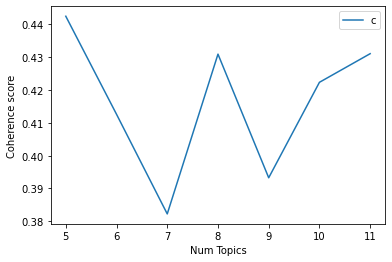

In [16]:
x = range(start, limit, step) 
plt.plot(x, coherence_values) 
plt.xlabel("Num Topics") 
plt.ylabel("Coherence score") 
plt.legend(("coherence_values"), loc='best') 
plt.show()
